In [1]:
import numpy as np
import xarray as xr
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

In [2]:
# for pretty plots:
#from cmocean import cm
# can't get this to work on casper yet

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4,3]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['lines.linewidth']= 2.0

Plan is to make some NPP plot for geoengineering runs, combining land and ocean NPP

- 8.5 2090-2099 relative to 2015-24
- 3.4 2060's relatve to ""
- 3.4 2070's relative to ""
- differences and percents without and with geoengineering


## Get NPP and SST for 85 projections

### Ocean NPP

In [3]:
# ssp5-8.5
# note these are allready proccessed for CMIP6 into individual timesries
# npp is only avail in the mo files
p_85 = '/glade/collections/cdg/timeseries-cmip6/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.001/ocn/proc/tseries/month_1/'
f_85 = 'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.001.pop.h.photoC_TOT_zint.201501-210012.nc'

ds_85 = xr.open_dataset(p_85+f_85,decode_times=False)

# use 2015-2024 (so first 12*10 months)
dates_85 = pd.date_range(start = '01/31/2015', end = '12/31/2100', freq='M')

In [4]:
NPP_ocn_85 = ds_85.photoC_TOT_zint 

In [5]:
NPP_ocn_85

<xarray.DataArray 'photoC_TOT_zint' (time: 1032, nlat: 384, nlon: 320)>
[126812160 values with dtype=float32]
Coordinates:
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
  * time     (time) float64 7.355e+05 7.355e+05 ... 7.668e+05 7.669e+05
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Total C Fixation Vertical Integral
    units:         mmol/m^3 cm/s
    grid_loc:      2110
    cell_methods:  time: mean

In [6]:
cfactorN = 12*0.001*864*365
# convert NPP from mmol/m3 cm/s to gC/m^2 yr-1=> *12/1000*86400*365/100

In [7]:
dates_85[0:12*10]

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31',
               ...
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')

In [8]:
# make baseline (where we are now):
NPP_ocn_85_2015_2024 = NPP_ocn_85[0:12*10, :,:].mean(axis = 0)
NPP_ocn_85_2015_2024 = NPP_ocn_85_2015_2024* cfactorN

/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20190723/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


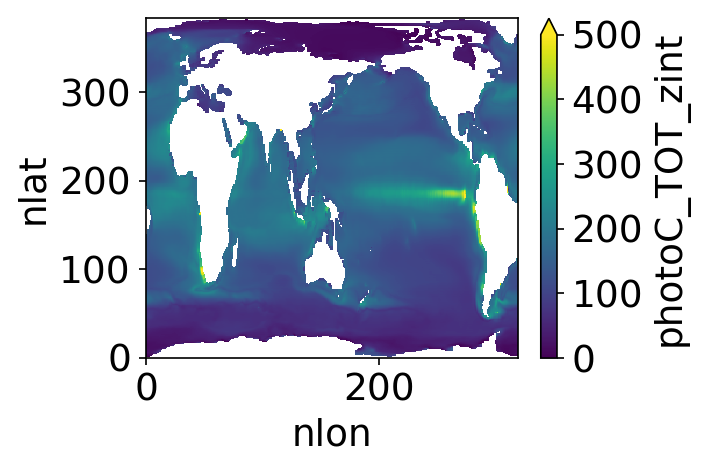

In [9]:
NPP_ocn_85_2015_2024.plot(vmin = 0, vmax = 500)

### SST

In [14]:
# get SST as well
p_85 = '/glade/collections/cdg/timeseries-cmip6/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.001/ocn/proc/tseries/month_1/'
f_85 = 'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.001.pop.h.TEMP.201501-210012.nc'

ds_85 = xr.open_dataset(p_85+f_85,decode_times=False)


In [16]:
SST_85 = ds_85.TEMP[:,0,:,:]

In [52]:
# make baseline (where we are now):
SST_85_2015_2024 = SST_85[0:12*10, :,:].mean(axis = 0)

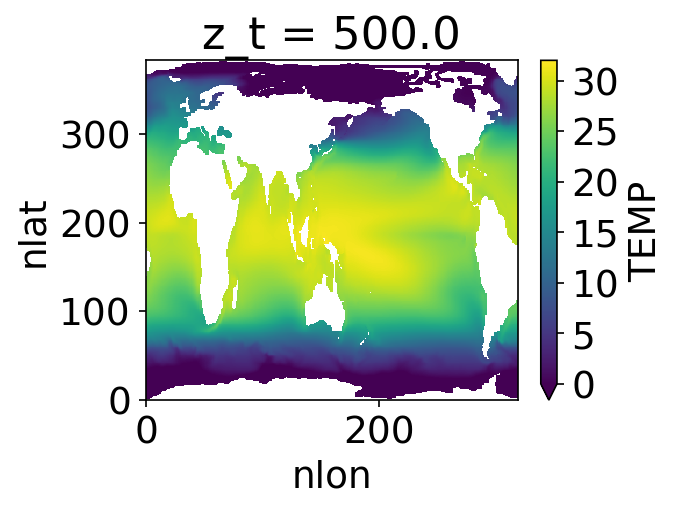

In [58]:
SST_85_2015_2024.plot(vmin = 0)

### Land NPP

In [39]:
# need the same for land NPP

p_85 = '/glade/collections/cdg/timeseries-cmip6/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.001/lnd/proc/tseries/month_1/'
f_85 = 'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.001.clm2.h0.NPP.201501-210012.nc'

ds_85_land = xr.open_dataset(p_85+f_85,decode_times=False)


In [44]:
# need to convert to per year from per second
NPP_lnd_85 = ds_85_land.NPP*86400*365

In [53]:
# make baseline (where we are now, first 9 years):
NPP_lnd_85_2015_2024 = NPP_lnd_85[0:12*10, :,:].mean(axis = 0)

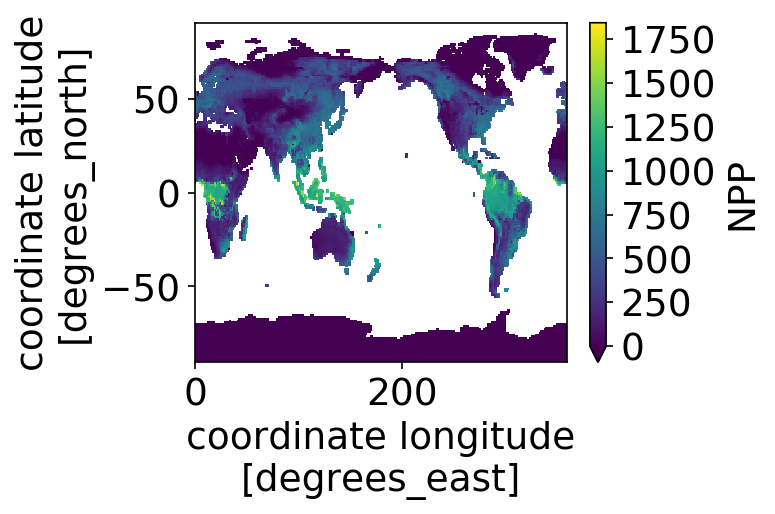

In [55]:
NPP_lnd_85_2015_2024.plot(vmin = 0)

## Get NPP and SST for 85 geoengineering

In [18]:
# 85 geo NPP ocean
# note I had to make this file from the archive, not proccessed
#p_85_geo = '/gpfs/fs1/p/nsc/nacm0002/geomip/archive/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001/'


f_85_geo = '~/Scratch/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.pop.h.photoC_TOT_zint.201901-210012.nc'

ds_85_geo = xr.open_dataset(f_85_geo,decode_times=False)

# note these two timeseries have different times

dates_85_geo = pd.date_range(start = '01/31/2019', end = '12/31/2100', freq='M')

In [22]:
NPP_85_geo = ds_85_geo.photoC_TOT_zint

In [30]:
NPP_85_geo

<xarray.DataArray 'photoC_TOT_zint' (time: 984, nlat: 384, nlon: 320)>
[120913920 values with dtype=float32]
Coordinates:
  * time     (time) float64 7.37e+05 7.37e+05 7.37e+05 ... 7.668e+05 7.669e+05
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Total C Fixation Vertical Integral
    units:         mmol/m^3 cm/s
    grid_loc:      2110
    cell_methods:  time: mean

In [26]:
# clean up a bit
del ds_85

In [28]:
del ds_85_geo, ds_85_land

In [29]:
# ocean SST, need to make
# note I had to make this file from the archive, not proccessed
#p_85_geo = '/gpfs/fs1/p/nsc/nacm0002/geomip/archive/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001/'

f_85_geo = '~/Scratch/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.pop.h.TEMP.nc'
ds_85_geo = xr.open_dataset(f_85_geo,decode_times=False)

SST_85_geo = ds_85_geo.TEMP[:,0,:,:]

In [31]:
SST_85_geo # this has the correct number of months

<xarray.DataArray 'TEMP' (time: 984, nlat: 384, nlon: 320)>
[120913920 values with dtype=float32]
Coordinates:
  * time     (time) float64 7.37e+05 7.37e+05 7.37e+05 ... 7.668e+05 7.669e+05
    z_t      float32 500.0
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

In [34]:
# land NPP, need to make

f_85_geo = '~/Scratch/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.clm2.h0.NPP.nc'
ds_85_geo = xr.open_dataset(f_85_geo,decode_times=False)

NPP_lnd_85_geo = ds_85_geo.NPP

Note not using control run here, using 2015-2024 of run

In [ ]:
npp_ocn_85_2015_2024 = ds_85.photoC_TOT_zint[0:12*10, :,:].mean(axis = 0)
npp_ocn_85_2015_2024 = npp_ocn_85_2015_2024* cfactorN

## Plot 8.5 2090-2099 relative to 2015-24

### set up grids for plotting

In [80]:
# ocean
clon = NPP_ocn_85.TLONG
clat = NPP_ocn_85.TLAT

clon = clon.values
clat = clat.values


clon[clon>180] = clon[clon>180]-360

##################
# manipulate data to plot
# make longitudes monotonically increasing
clon = np.where(np.greater_equal(clon,min(clon[:,0])),clon-360,clon)

# stack grids side-by-side (in longitudinal direction), so
# any range of longitudes may be plotted on a world map
clon = np.concatenate((clon,clon+360),1)
clat = np.concatenate((clat,clat),1)
clon.max()

320.20672770545804

In [81]:
# land

lon = NPP_lnd_85.lon
lat = NPP_lnd_85.lat

lon = lon.values
lat = lat.values


# stack grids side-by-side (in longitudinal direction), so
# any range of longitudes may be plotted on a world map
lon = np.concatenate((lon,lon+360),0)
lon = lon - 360
lon.max()

# lat is not concatenated, 1D




358.75

### NPP

In [63]:
dates_85[12*(90-15):(12*(99-15)+1)]

DatetimeIndex(['2090-01-31', '2090-02-28', '2090-03-31', '2090-04-30',
               '2090-05-31', '2090-06-30', '2090-07-31', '2090-08-31',
               '2090-09-30', '2090-10-31',
               ...
               '2098-04-30', '2098-05-31', '2098-06-30', '2098-07-31',
               '2098-08-31', '2098-09-30', '2098-10-31', '2098-11-30',
               '2098-12-31', '2099-01-31'],
              dtype='datetime64[ns]', length=109, freq='M')

### ocean

In [66]:
# ocean
NPP_ocn_85_2090_99 = NPP_ocn_85[12*(90-15):(12*(99-15)+1), :,:].mean(axis = 0)
NPP_ocn_85_2090_99 *= cfactorN

/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20190723/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


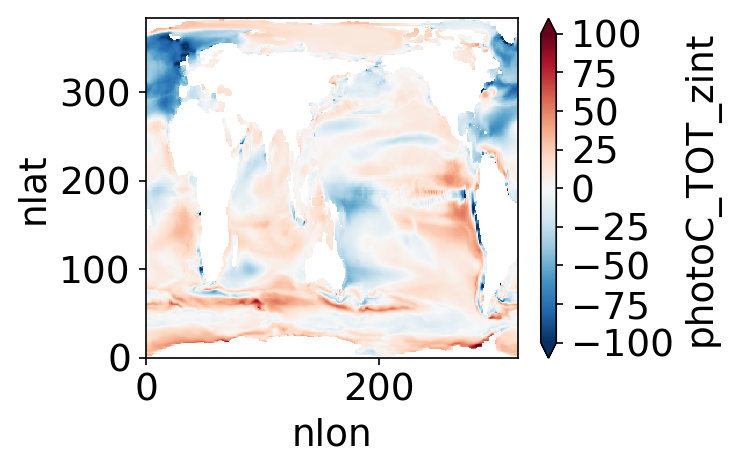

In [73]:
(NPP_ocn_85_2090_99-NPP_ocn_85_2015_2024).plot(vmin = -100)

### land

In [74]:
#land
NPP_lnd_85_2090_99 = NPP_lnd_85[12*(90-15):(12*(99-15)+1), :,:].mean(axis = 0)


/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20190723/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5,1,'2090s')

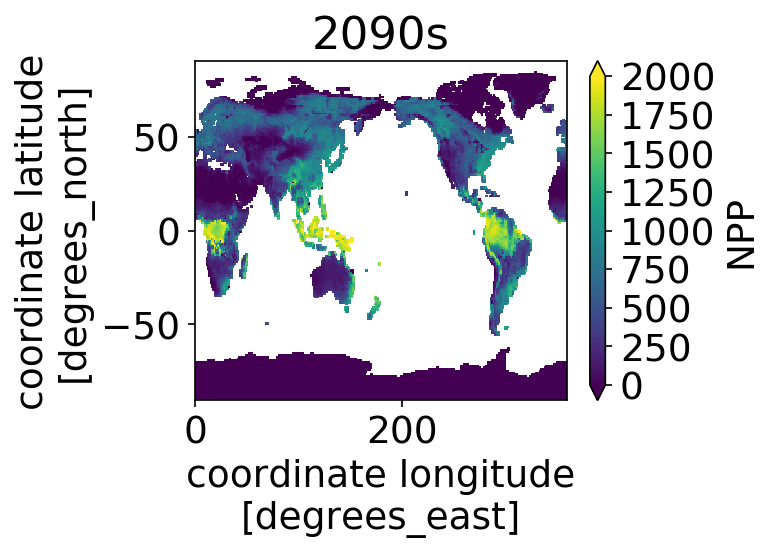

In [97]:
NPP_lnd_85_2090_99.plot(vmin = 0, vmax = 2000)
plt.title('2090s')

Text(0.5,1,'2015-24')

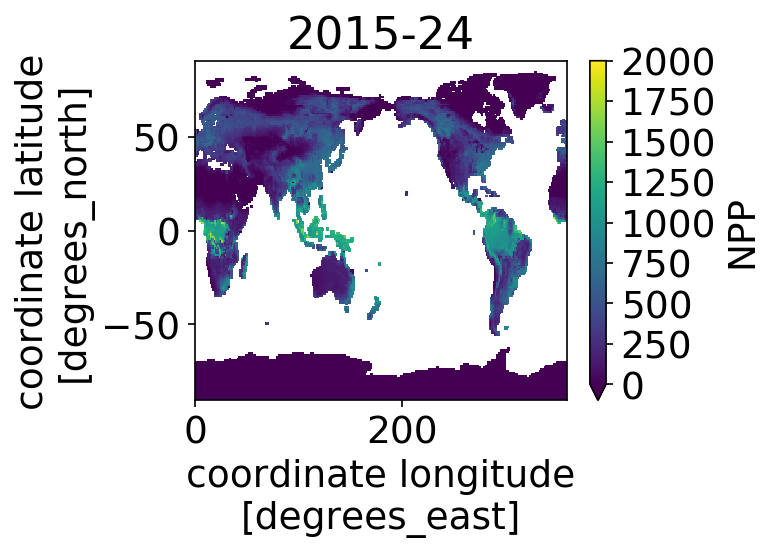

In [98]:
NPP_lnd_85_2015_2024.plot(vmin = 0, vmax = 2000)
plt.title('2015-24')

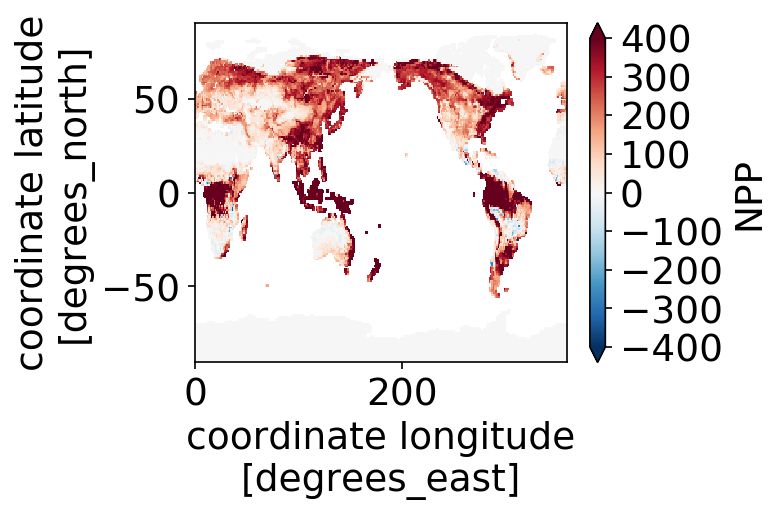

In [77]:
(NPP_lnd_85_2090_99-NPP_lnd_85_2015_2024).plot(vmin = -400)

Text(0.5,1,'NPP Change in SSP5-8.5: 2090-99 from 2015-24')

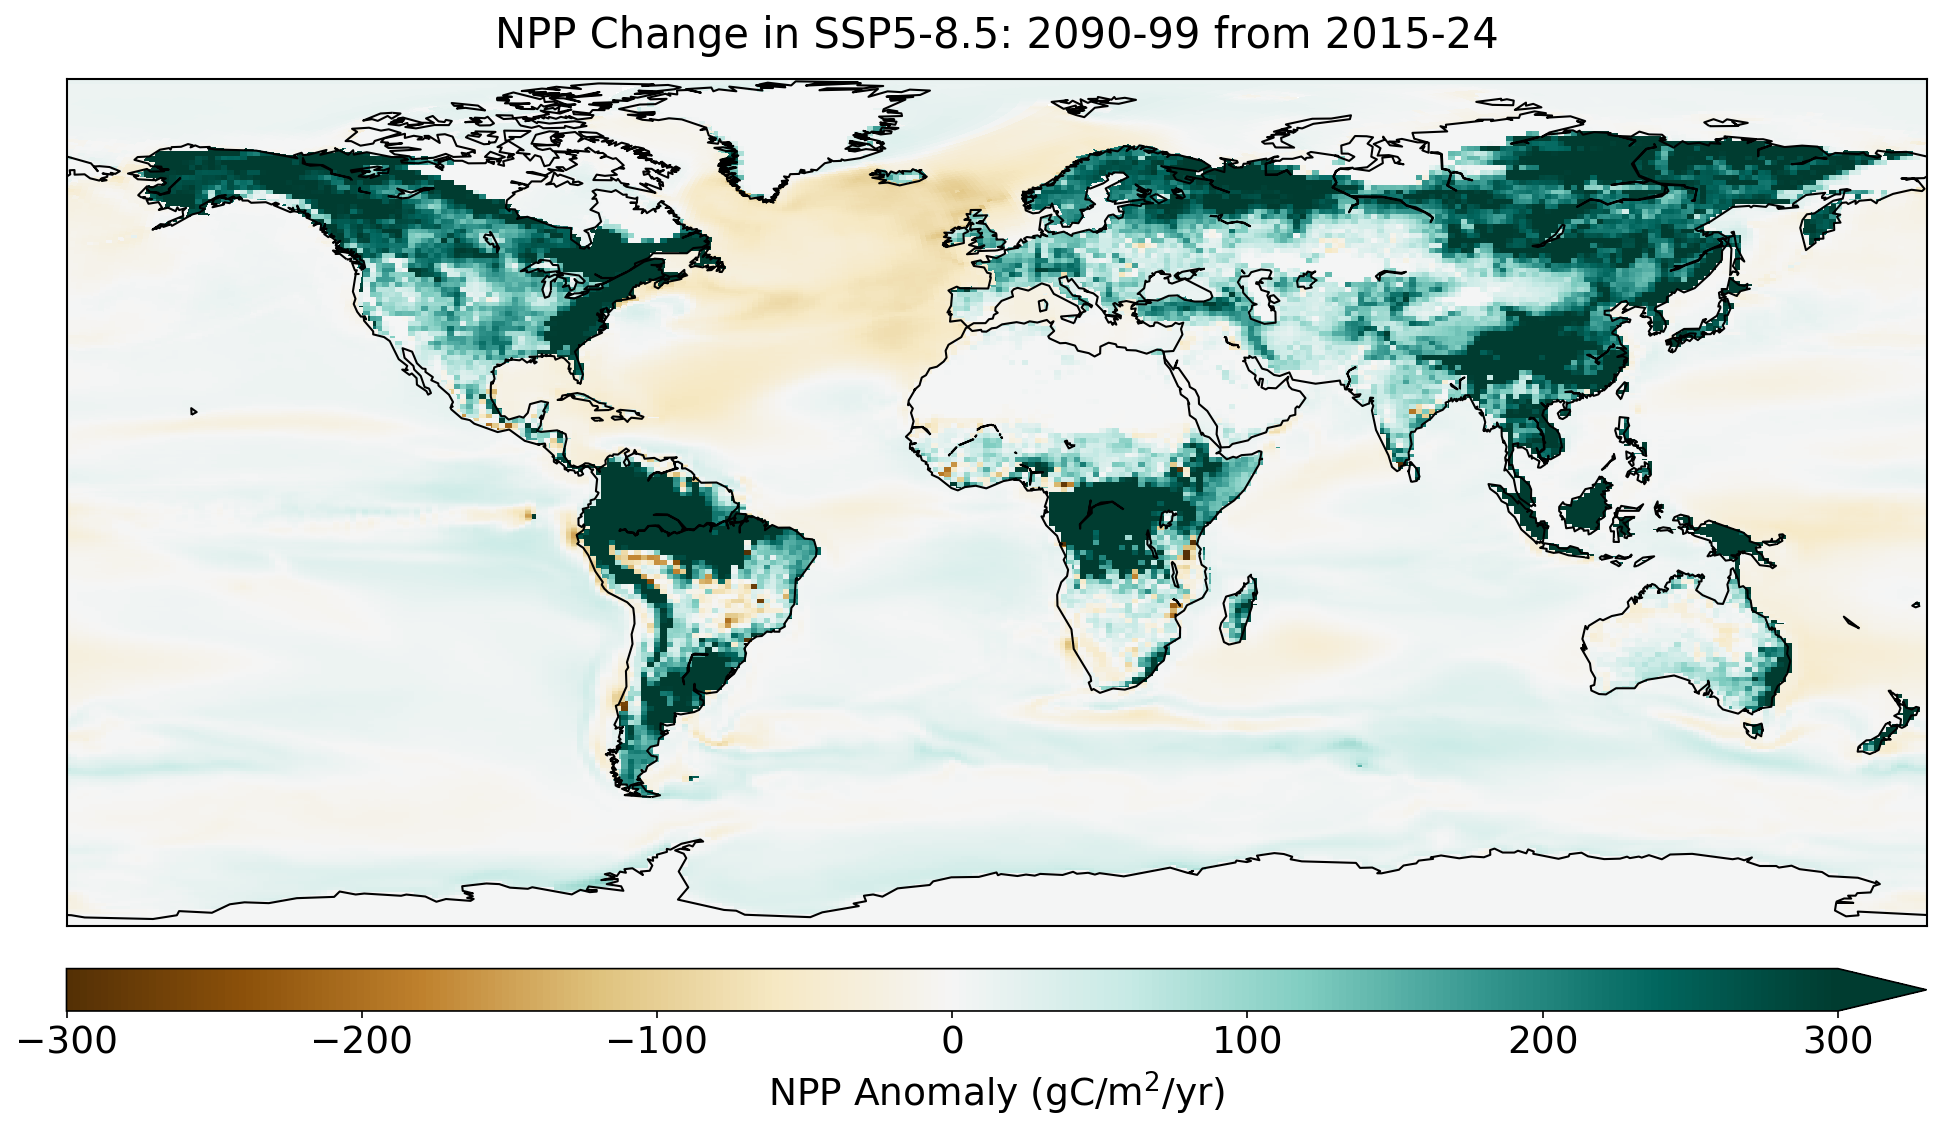

In [107]:
ax = plt.figure(figsize=(16,20), facecolor = 'w')

vmin = -300
vmax = 300


#----------------------
# plot NPP anom
# land
var2 = NPP_lnd_85_2090_99 - NPP_lnd_85_2015_2024
# ocean
var = NPP_ocn_85_2090_99 - NPP_ocn_85_2015_2024


# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180

#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
#m.fillcontinents(color='#ddaa66')
#m.fillcontinents(color='w')
#m.drawmapboundary(fill_color='white')

# land
temp2 = np.ma.concatenate((var2,var2),1)
x2, y2 = m(lon,lat)
im2 = m.pcolormesh(x2,y2,temp2,vmin = vmin, vmax = vmax, cmap = 'BrBG')
#cbar = m.colorbar(im2,location='bottom',pad="5%")

# ocean
temp = np.ma.concatenate((var,var),1)
temp = np.ma.masked_where(temp ==0, temp) # mask out the land zeros to make transparent
x, y = m(clon,clat)
im1 = m.pcolormesh(x,y,temp,vmin = vmin, vmax = vmax, cmap = 'BrBG')
cbar = m.colorbar(im1,location='bottom',pad="5%", extend = 'max')
cbar.set_label('NPP Anomaly ($\mathrm{gC/m^2/yr}$)')#, fontsize=15)
plt.title('NPP Change in SSP5-8.5: 2090-99 from 2015-24', fontsize=20, pad=15)

#plt.title(dates[monthi].strftime('%B %Y'),pad = 20)

Text(0.5,1,'NPP Change in SSP5-8.5: 2090-99 from 2015-24')

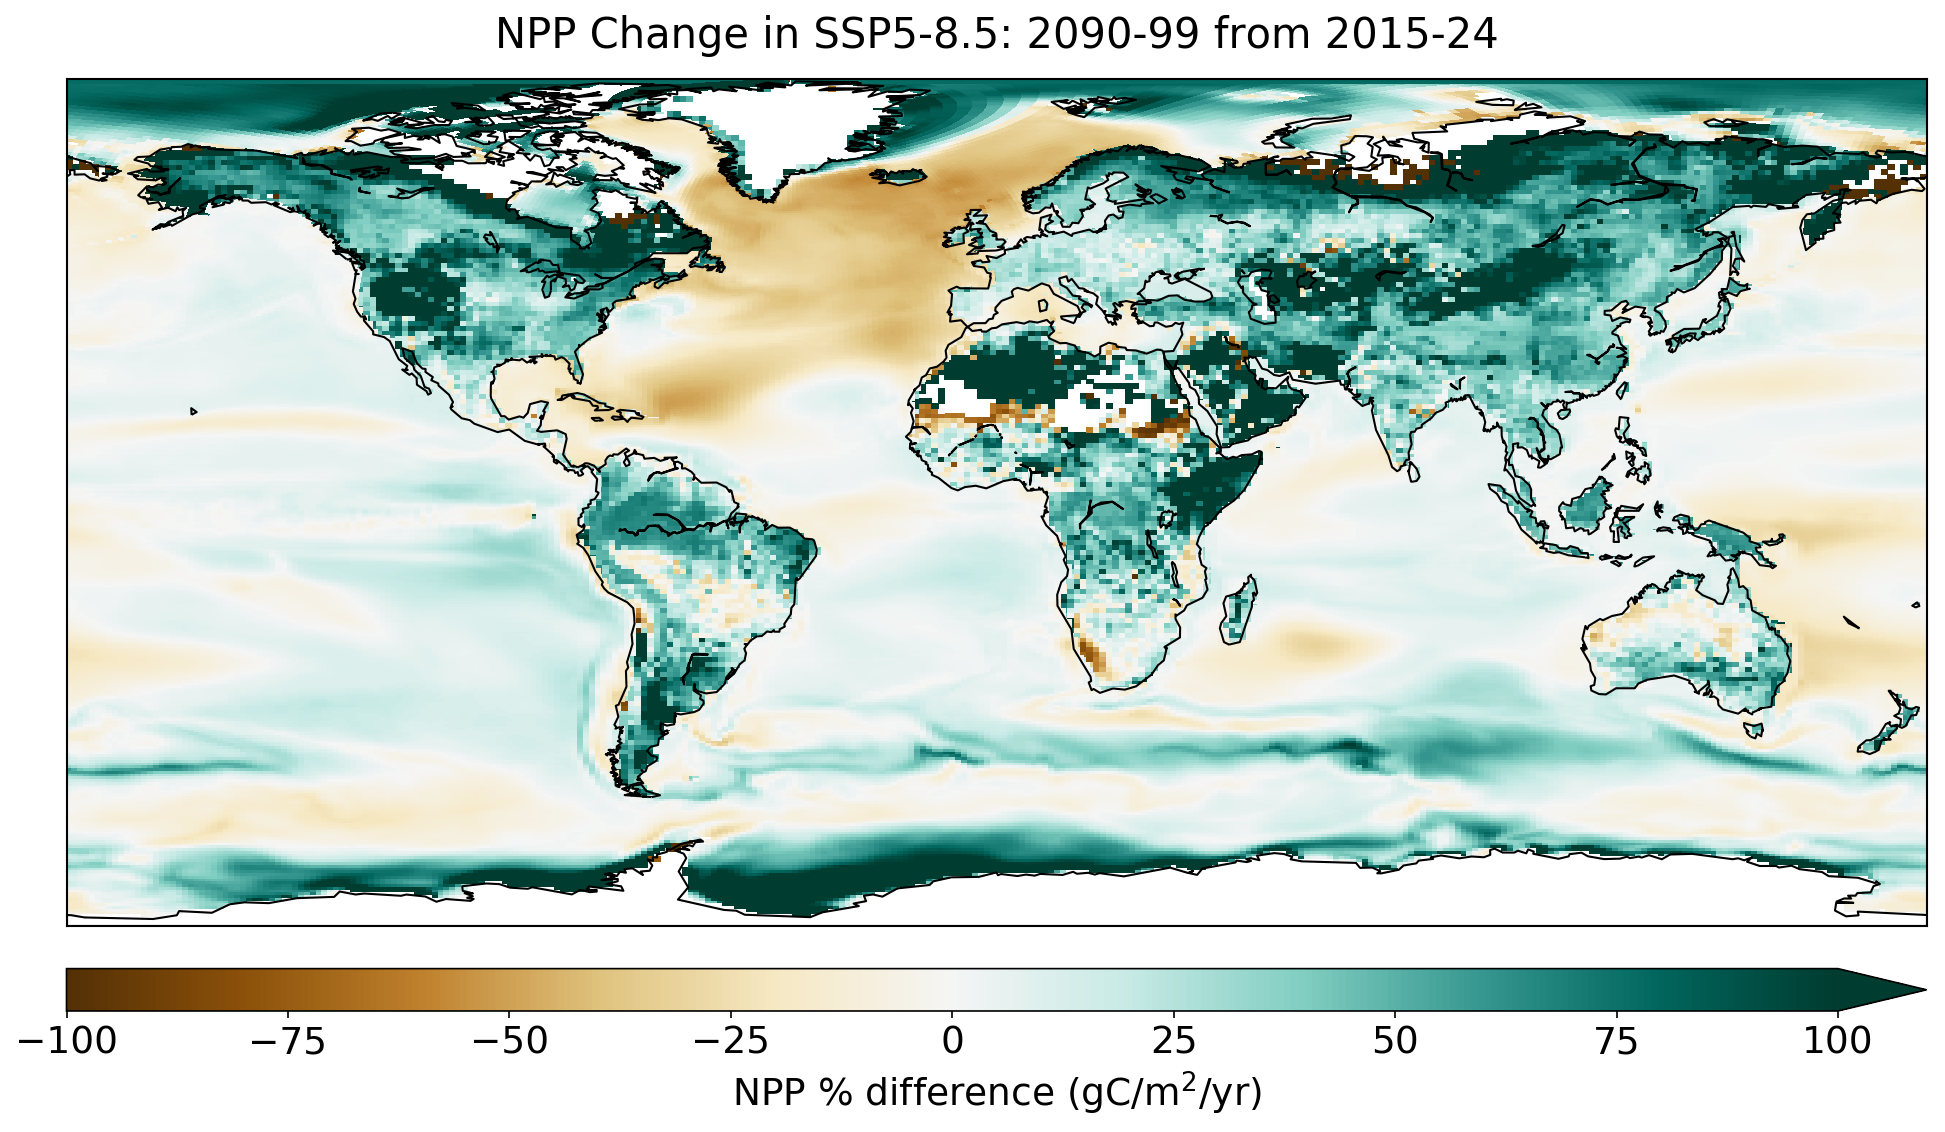

In [113]:
# percent change

ax = plt.figure(figsize=(16,20), facecolor = 'w')

vmin = -100
vmax = 100
clabel = 'NPP % difference ($\mathrm{gC/m^2/yr}$)'

#----------------------
# plot NPP anom
# land
var2 = 100* (NPP_lnd_85_2090_99 - NPP_lnd_85_2015_2024)/NPP_lnd_85_2015_2024
# ocean
var = 100*(NPP_ocn_85_2090_99 - NPP_ocn_85_2015_2024)/NPP_ocn_85_2015_2024


# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180

#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
#m.fillcontinents(color='#ddaa66')
#m.fillcontinents(color='w')
#m.drawmapboundary(fill_color='white')

# land
temp2 = np.ma.concatenate((var2,var2),1)
x2, y2 = m(lon,lat)
im2 = m.pcolormesh(x2,y2,temp2,vmin = vmin, vmax = vmax, cmap = 'BrBG')
#cbar = m.colorbar(im2,location='bottom',pad="5%")

# ocean
temp = np.ma.concatenate((var,var),1)
temp = np.ma.masked_where(temp ==0, temp) # mask out the land zeros to make transparent
x, y = m(clon,clat)
im1 = m.pcolormesh(x,y,temp,vmin = vmin, vmax = vmax, cmap = 'BrBG')
cbar = m.colorbar(im1,location='bottom',pad="5%", extend = 'max')
cbar.set_label(clabel)#, fontsize=15)
plt.title('NPP Change in SSP5-8.5: 2090-99 from 2015-24', fontsize=20, pad=15)

#plt.title(dates[monthi].strftime('%B %Y'),pad = 20)

## Plot 8.5 2060-2069 relative to 2015-24

In [114]:
dates_85[12*(60-15):(12*(69-15)+1)]

DatetimeIndex(['2060-01-31', '2060-02-29', '2060-03-31', '2060-04-30',
               '2060-05-31', '2060-06-30', '2060-07-31', '2060-08-31',
               '2060-09-30', '2060-10-31',
               ...
               '2068-04-30', '2068-05-31', '2068-06-30', '2068-07-31',
               '2068-08-31', '2068-09-30', '2068-10-31', '2068-11-30',
               '2068-12-31', '2069-01-31'],
              dtype='datetime64[ns]', length=109, freq='M')

In [119]:
# ocean
NPP_ocn_85_2060_69 = NPP_ocn_85[12*(60-15):(12*(69-15)+1), :,:].mean(axis = 0)
NPP_ocn_85_2060_69 *= cfactorN

In [120]:
#land
NPP_lnd_85_2060_69 = NPP_lnd_85[12*(60-15):(12*(69-15)+1), :,:].mean(axis = 0)


/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20190723/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5,1,'NPP Change in SSP5-8.5: 2060-70 from 2015-25')

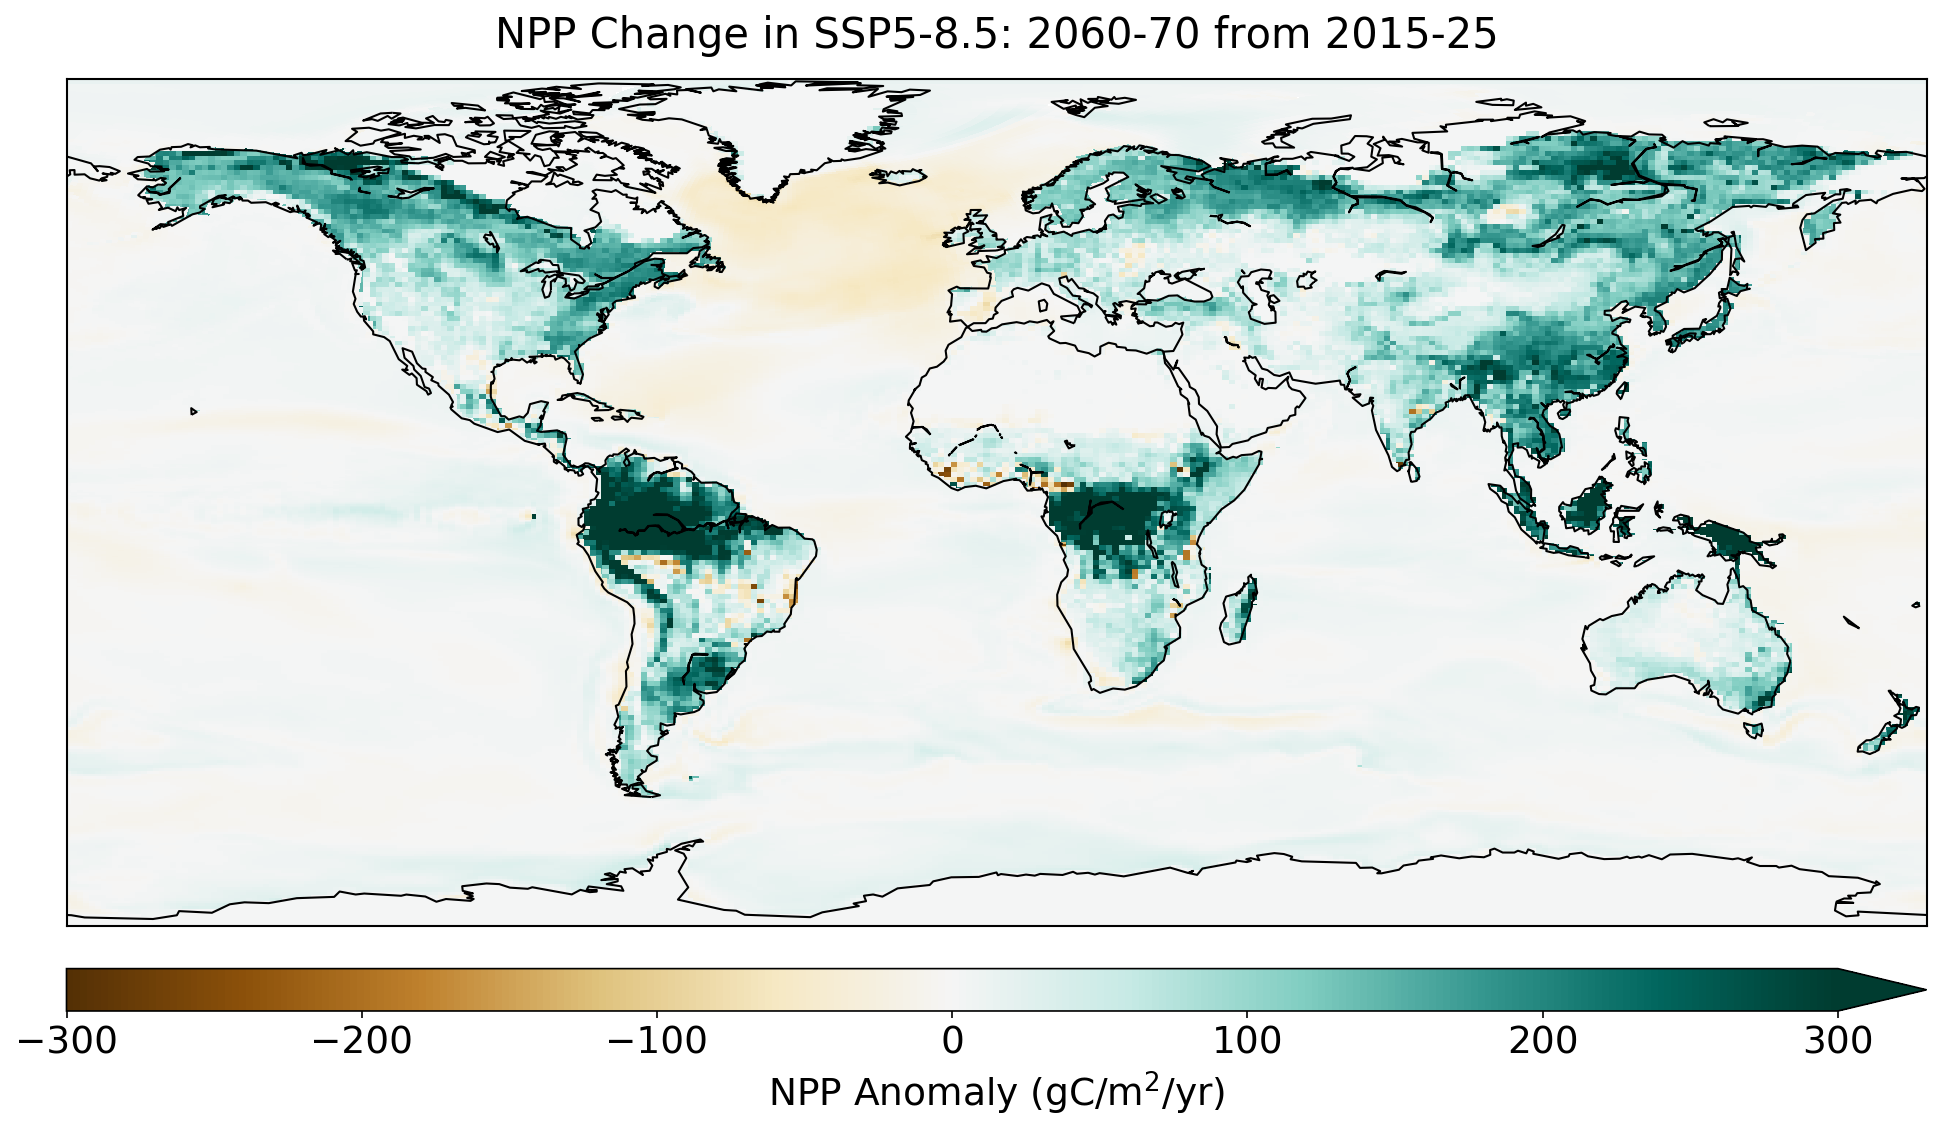

In [128]:
ax = plt.figure(figsize=(16,20), facecolor = 'w')

vmin = -300
vmax = 300


#----------------------
# plot NPP anom
# land
npp_lnd = NPP_lnd_85[12*(60-15):(12*(70-15)+1), :,:].mean(axis = 0)
npp_lnd_b = NPP_lnd_85[0:12*11, :,:].mean(axis = 0)

var2 = npp_lnd - npp_lnd_b


# ocean
npp_ocn = cfactorN * NPP_ocn_85[12*(60-15):(12*(70-15)+1), :,:].mean(axis = 0)
npp_ocn_b = cfactorN * NPP_ocn_85[0:12*11, :,:].mean(axis = 0)

var = npp_ocn - npp_ocn_b


# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180

#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
#m.fillcontinents(color='#ddaa66')
#m.fillcontinents(color='w')
#m.drawmapboundary(fill_color='white')

# land
temp2 = np.ma.concatenate((var2,var2),1)
x2, y2 = m(lon,lat)
im2 = m.pcolormesh(x2,y2,temp2,vmin = vmin, vmax = vmax, cmap = 'BrBG')
#cbar = m.colorbar(im2,location='bottom',pad="5%")

# ocean
temp = np.ma.concatenate((var,var),1)
temp = np.ma.masked_where(temp ==0, temp) # mask out the land zeros to make transparent
x, y = m(clon,clat)
im1 = m.pcolormesh(x,y,temp,vmin = vmin, vmax = vmax, cmap = 'BrBG')
cbar = m.colorbar(im1,location='bottom',pad="5%", extend = 'max')
cbar.set_label('NPP Anomaly ($\mathrm{gC/m^2/yr}$)')#, fontsize=15)
plt.title('NPP Change in SSP5-8.5: 2060-70 from 2015-25', fontsize=20, pad=15)

#plt.title(dates[monthi].strftime('%B %Y'),pad = 20)

Text(0.5,1,'NPP Change in SSP5-8.5: 2060-69 from 2015-24')

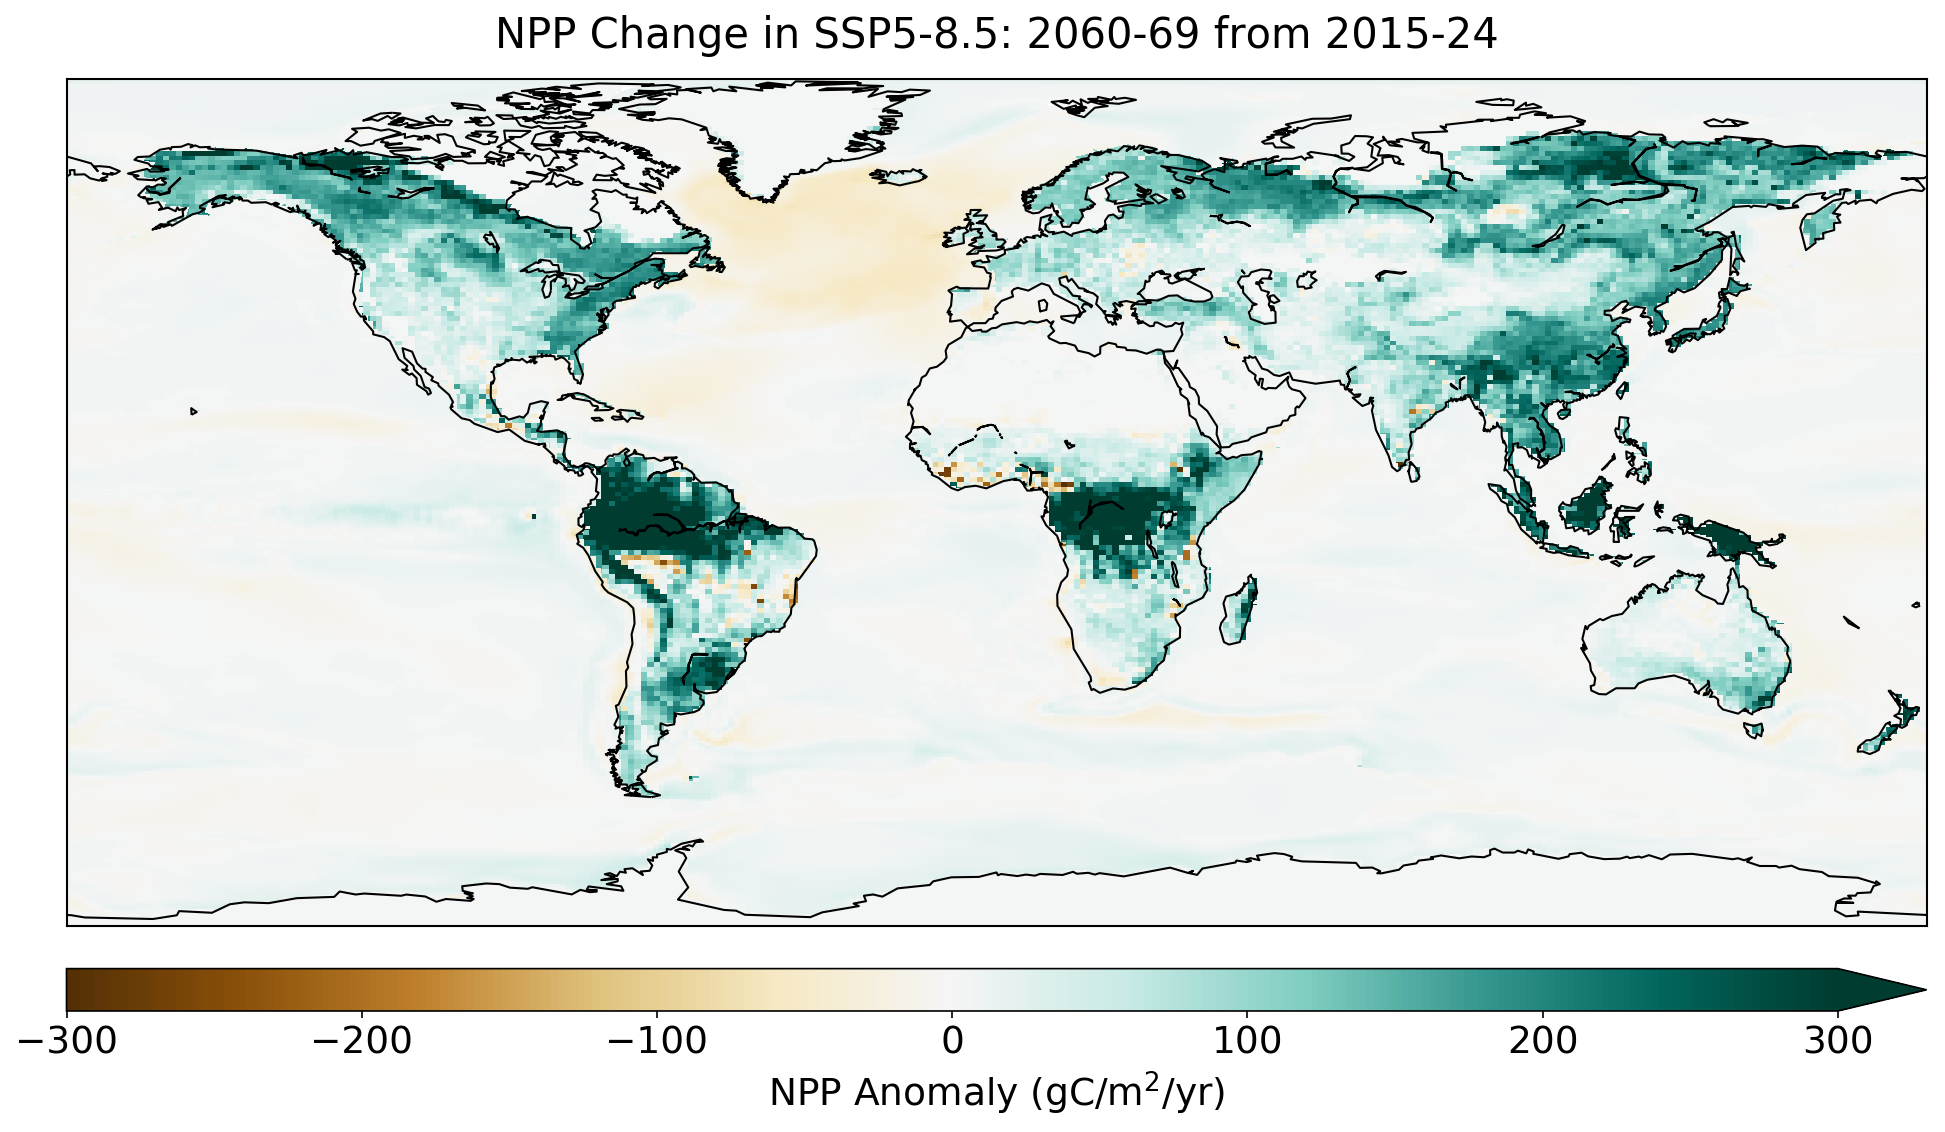

In [124]:
ax = plt.figure(figsize=(16,20), facecolor = 'w')

vmin = -300
vmax = 300


#----------------------
# plot NPP anom
# land
var2 = NPP_lnd_85_2060_69 - NPP_lnd_85_2015_2024
# ocean
var = NPP_ocn_85_2060_69 - NPP_ocn_85_2015_2024


# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180

#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
#m.fillcontinents(color='#ddaa66')
#m.fillcontinents(color='w')
#m.drawmapboundary(fill_color='white')

# land
temp2 = np.ma.concatenate((var2,var2),1)
x2, y2 = m(lon,lat)
im2 = m.pcolormesh(x2,y2,temp2,vmin = vmin, vmax = vmax, cmap = 'BrBG')
#cbar = m.colorbar(im2,location='bottom',pad="5%")

# ocean
temp = np.ma.concatenate((var,var),1)
temp = np.ma.masked_where(temp ==0, temp) # mask out the land zeros to make transparent
x, y = m(clon,clat)
im1 = m.pcolormesh(x,y,temp,vmin = vmin, vmax = vmax, cmap = 'BrBG')
cbar = m.colorbar(im1,location='bottom',pad="5%", extend = 'max')
cbar.set_label('NPP Anomaly ($\mathrm{gC/m^2/yr}$)')#, fontsize=15)
plt.title('NPP Change in SSP5-8.5: 2060-69 from 2015-24', fontsize=20, pad=15)

#plt.title(dates[monthi].strftime('%B %Y'),pad = 20)